In [664]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.datasets import make_circles, make_blobs

In [665]:
data = pd.read_csv('/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/mglearn/data/adult.data',
                   header = None,
                   names = ('age', 'workclass', 'fnlwgt', 'education',  'education-num', 'marital-status', 
                            'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 
                            'hours-per-week', 'native-country', 'income'
                           ),
                   index_col = False
                  )

display(data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [666]:
print(data.columns, '\n')
print(data.workclass.value_counts(), '\n')
print(data['marital-status'].value_counts(), '\n')
print(data['native-country'].value_counts(), '\n')
print(data['hours-per-week'].value_counts(), '\n')

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada               

In [667]:
# Very useful way to deal with categorical or string-type entries
# Modify string-type entries while keeping the numerical as it is
dummies = pd.get_dummies(data)

print(data.columns, '\n')
print(dummies.columns, '\n')

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia',
       'income_ <=50K', 'income_ >50K'],
      dtype='object', length=110) 



In [668]:
display(dummies.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [669]:
X = np.array(dummies.iloc[:, 0:109])
print(X)
print(X.shape)
y = np.array(dummies.iloc[:, 109])
print(y)
print(y.shape)

[[    39  77516     13 ...      0      0      1]
 [    50  83311     13 ...      0      0      1]
 [    38 215646      9 ...      0      0      1]
 ...
 [    58 151910      9 ...      0      0      1]
 [    22 201490      9 ...      0      0      1]
 [    52 287927      9 ...      0      0      0]]
(32561, 109)
[0 0 0 ... 0 0 1]
(32561,)


In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [671]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier().fit(X_train, y_train)

print('Train:\t', sgd.score(X_train, y_train))
print('Test:\t', sgd.score(X_test, y_test))
print()

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression().fit(X_train, y_train)

print('Train:\t', lor.score(X_train, y_train))
print('Test:\t', lor.score(X_test, y_test))
print()

Train:	 0.7825143325143326
Test:	 0.784301682839946

Train:	 0.7977477477477477
Test:	 0.7956025058346641



(100, 1)
(100,)


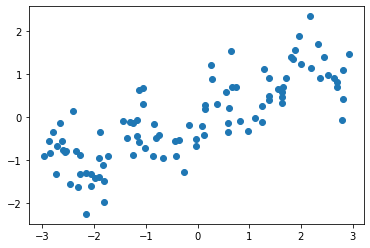

In [672]:
import mglearn

X, y = mglearn.datasets.make_wave(n_samples = 100)
print(X.shape)
print(y.shape)

plt.scatter(X[:,0], y)
plt.show()

In [673]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge

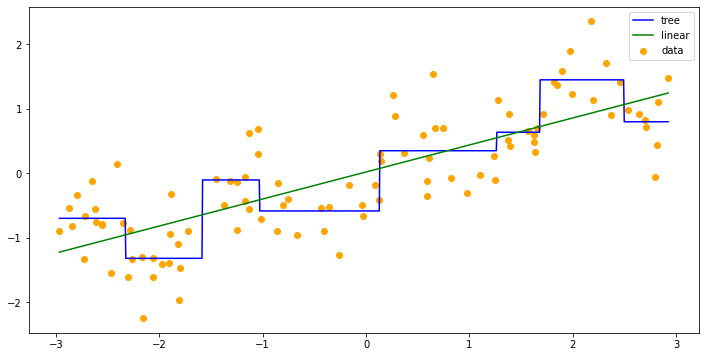

In [674]:
tree = DecisionTreeRegressor(max_depth = 3).fit(X, y)
lin = Ridge().fit(X, y)

xx = np.linspace(np.min(X), np.max(X), X.shape[0] * 10)

plt.subplots(figsize = (12,6))
plt.scatter(X[:,0], y, color = 'orange', label = 'data')
plt.plot(xx, tree.predict(xx.reshape(-1, 1)), color = 'blue', label = 'tree')
plt.plot(xx, lin.predict(xx.reshape(-1, 1)), color = 'green', label = 'linear')
plt.legend()
plt.show()

In [675]:
bins = np.linspace(-3, 3, 11)
print(bins)

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [676]:
which_bin = np.digitize(X, bins = bins)
for i in range(5):
    print(X[i,0], '\t:\t', which_bin[i])
print(which_bin.shape)

-0.752759286915825 	:	 [4]
2.704285838459497 	:	 [10]
1.3919636508684308 	:	 [8]
0.5919509051822196 	:	 [6]
-2.0638881573453807 	:	 [2]
(100, 1)


In [677]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False).fit(which_bin)
X_binned = enc.transform(which_bin)
print(X_binned[:5])
print(X_binned.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(100, 10)


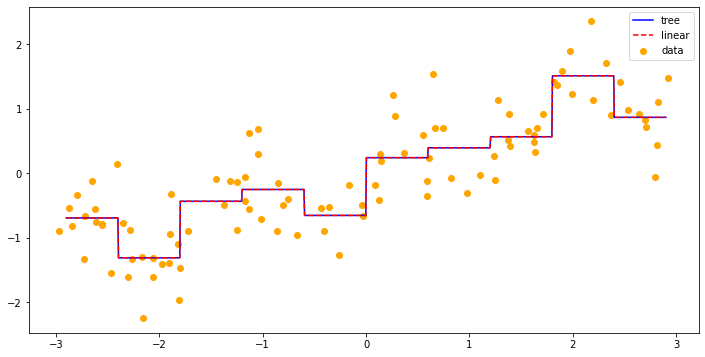

In [678]:
enc = OneHotEncoder(sparse = False)
X_binned = enc.fit_transform(which_bin)

tree = DecisionTreeRegressor().fit(X_binned, y)
lin = LinearRegression().fit(X_binned, y)

xx = np.linspace(-2.9, 2.9, 1000)
# print(xx)
xx_binned = enc.fit_transform(np.digitize(xx.reshape(-1, 1), bins = bins))
# print(xx_binned)
# print(xx_binned.shape)
# print(X_binned)
# print(X_binned.shape)

plt.subplots(figsize = (12, 6))
plt.scatter(X[:,0], y, color = 'orange', label = 'data')
plt.plot(xx, tree.predict(xx_binned), color = 'blue', label = 'tree')
plt.plot(xx, lin.predict(xx_binned), color = 'red', label = 'linear', linestyle = '--')
plt.legend()
plt.show()

(100, 11)


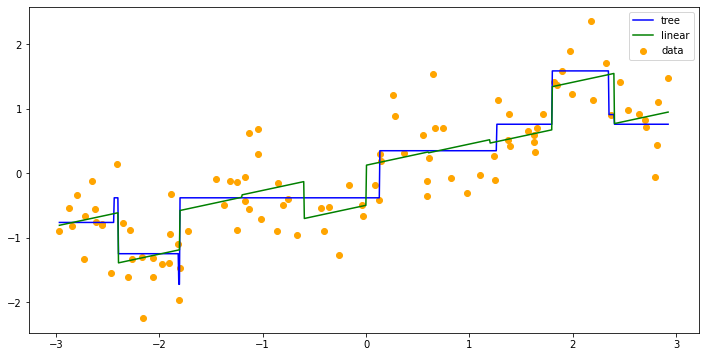

In [679]:
X_combined = np.hstack((X, X_binned))
print(X_combined.shape)

tree = DecisionTreeRegressor(max_depth = 3).fit(X_combined, y)
lin = Ridge().fit(X_combined, y)

xx = np.linspace(np.min(X_combined), np.max(X_combined), X.shape[0] * 10).reshape(-1, 1)
# print(xx)
xx_combined = np.hstack((xx, enc.fit_transform(np.digitize(xx, bins = bins))))

plt.subplots(figsize = (12,6))
plt.scatter(X_combined[:, 0], y, color = 'orange', label = 'data')
plt.plot(xx, tree.predict(xx_combined), color = 'blue', label = 'tree')
plt.plot(xx, lin.predict(xx_combined), color = 'green', label = 'linear')
plt.legend()
plt.show()

(100, 11)


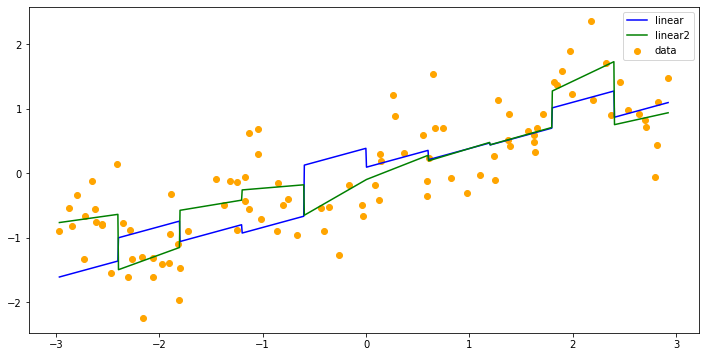

In [680]:
X_combined2 = np.hstack((X, X_binned * X))
#print(X_combined2[:5])
print(X_combined.shape)

tree = DecisionTreeRegressor(max_depth = 3).fit(X_combined2, y)
lin = Ridge().fit(X_combined2, y)

xx2 = np.linspace(np.min(X_combined2), np.max(X_combined2), X.shape[0] * 10).reshape(-1, 1)
# print(xx)
xx_combined2 = np.hstack((xx2, xx2 * enc.fit_transform(np.digitize(xx2, bins = bins))))

plt.subplots(figsize = (12,6))
plt.scatter(X_combined2[:, 0], y, color = 'orange', label = 'data')
# plt.plot(xx2, tree.predict(xx_combined2), color = 'blue', label = 'tree')
plt.plot(xx, lin.predict(xx_combined), color = 'blue', label = 'linear')
plt.plot(xx2, lin.predict(xx_combined2), color = 'green', label = 'linear2')
plt.legend()
plt.show()

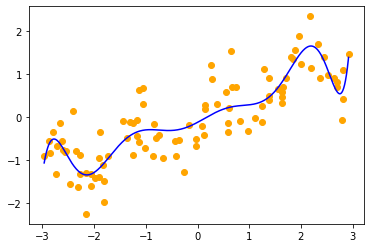

In [681]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, interaction_only = False)

X_poly = poly.fit_transform(X)
# print(X[:5])
# print(X.shape)
# print(X_poly[:5])
# print(X_poly.shape)

xx = np.linspace(np.min(X), np.max(X), X.shape[0] * 10).reshape(-1, 1)
xx_poly = poly.fit_transform(xx)

plt.scatter(X_poly[:, 1], y, color = 'orange')
plt.plot(xx, Ridge().fit(X_poly, y).predict(xx_poly), color = 'blue')

plt.show()

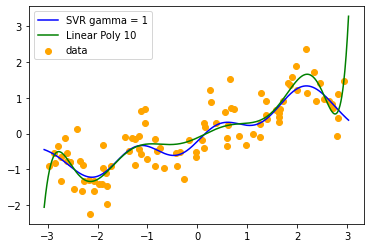

In [682]:
from sklearn.svm import SVR

svr = SVR(gamma = 1).fit(X, y)

xx = np.linspace(np.min(X) - 0.1, np.max(X) + 0.1, X.shape[0] * 10).reshape(-1, 1)
xx_poly = poly.fit_transform(xx)

plt.scatter(X_poly[:, 1], y, color = 'orange', label = 'data')
plt.plot(xx, svr.fit(X, y).predict(xx), color = 'blue', label = 'SVR gamma = 1')
plt.plot(xx, Ridge().fit(X_poly, y).predict(xx_poly), color = 'green', label = 'Linear Poly 10')

plt.legend()
plt.show()

In [683]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()

X: (506, 13) y: (506,)


,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  from ipykernel import kernelapp as app


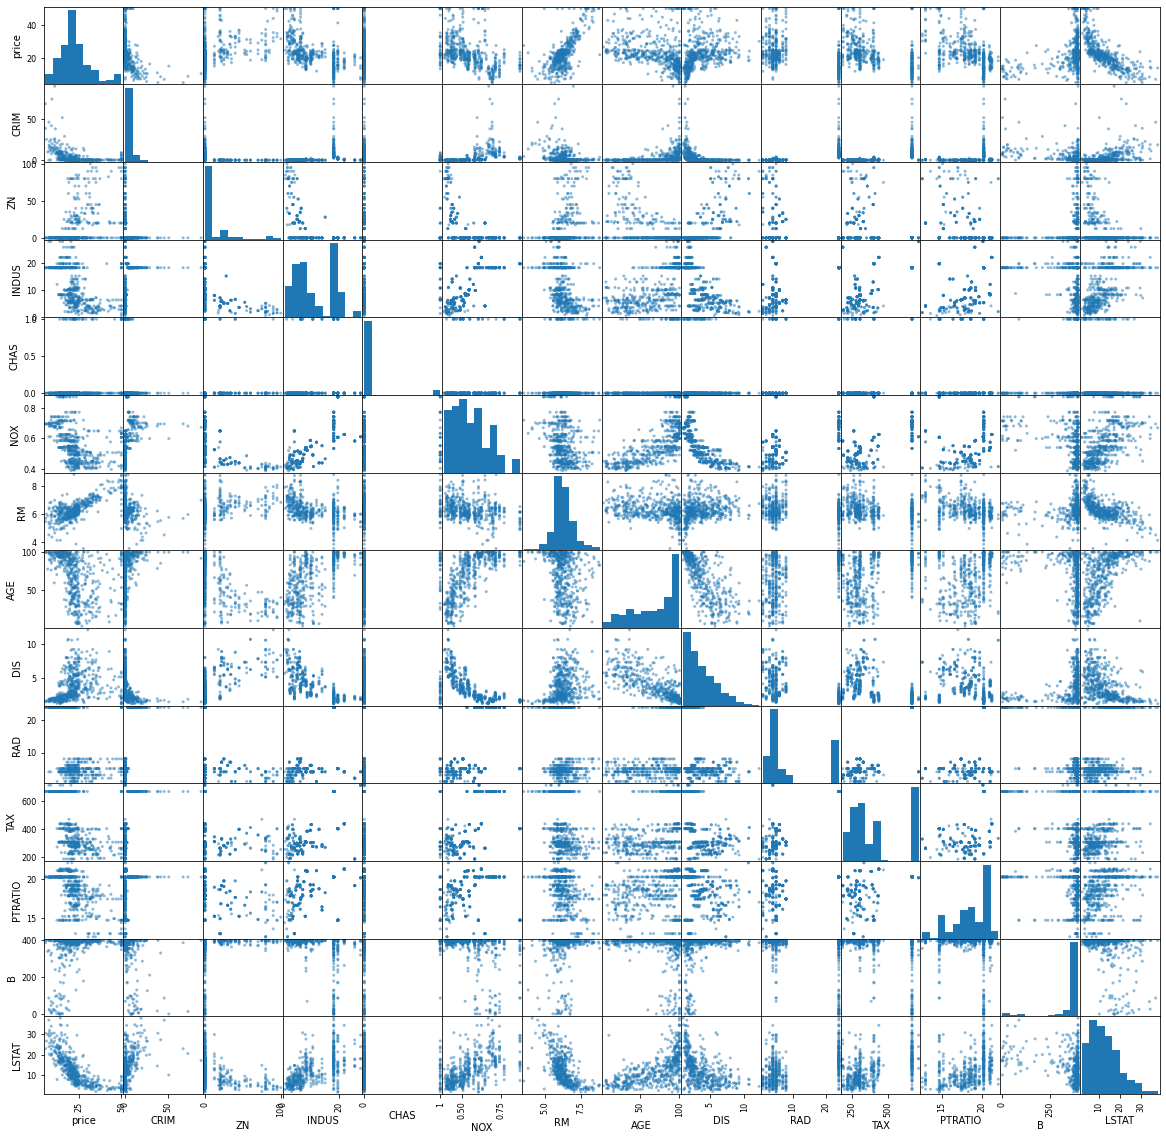

In [684]:
X, y = (boston.data, boston.target)

print('X:', X.shape, 'y:', y.shape)
# print(X[:2])
# print(y[:2])

table_data = np.hstack((y.reshape(-1, 1), X))
column_names = ['price'] + list(boston.feature_names)

table = pd.DataFrame(data = table_data, columns = column_names)

display(table.head())

fig, ax = plt.subplots(1,1, figsize = (20, 20))
pd.plotting.scatter_matrix(table, ax = ax) # Takes a couple of seconds
plt.show()

In [685]:
X = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

poly = PolynomialFeatures(degree = 2, interaction_only = False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train_poly.shape, X_test_poly.shape)
print(poly.get_feature_names())

(379, 105) (127, 105)
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [686]:
lin = Ridge(alpha = 0.1).fit(X_train, y_train)

print('Lin Train:\t', lin.score(X_train, y_train))
print('Lin Test:\t', lin.score(X_test, y_test))
print()

linp = Ridge(alpha = 0.1).fit(X_train_poly, y_train)

print('Poly Train:\t', linp.score(X_train_poly, y_train))
print('Poly Test:\t', linp.score(X_test_poly, y_test))
print()

svm = SVR(gamma = 1, C = 100).fit(X_train, y_train)

print('SVR Train:\t', svm.score(X_train, y_train))
print('SVR Test:\t', svm.score(X_test, y_test))
print()

ran = RandomForestRegressor(n_estimators = 100, max_depth = 6).fit(X_train, y_train)

print('RF Train:\t', ran.score(X_train, y_train))
print('RF Test:\t', ran.score(X_test, y_test))
print()

ran = RandomForestRegressor(n_estimators = 100, max_depth = 5).fit(X_train_poly, y_train)

print('RF P Train:\t', ran.score(X_train_poly, y_train))
print('RF P Test:\t', ran.score(X_test_poly, y_test))
print()

Lin Train:	 0.769703556426779
Lin Test:	 0.6343140119324686

Poly Train:	 0.9282273685001984
Poly Test:	 0.7722067936479804

SVR Train:	 0.964607855728368
SVR Test:	 0.8113825312116739

RF Train:	 0.9640248103774992
RF Test:	 0.7770707998701862

RF P Train:	 0.9631123028864088
RF P Test:	 0.753135689107875



In [687]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

In [688]:
X, y = (cancer.data, cancer.target)

print('X:', X.shape, 'y:', y.shape)
# print(X[:2])
# print(y[:2])

table_data = np.hstack((y.reshape(-1, 1), X))
column_names = ['M or B'] + list(cancer.feature_names)

table = pd.DataFrame(data = table_data, columns = column_names)

display(table.head())

X: (569, 30) y: (569,)


,M or B,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[457.  81. 491. 395.  69. 251. 377. 640.  56.   0. 189.   0. 178. 162.
   3.  32.  15.  69.   0.   1. 611. 104. 634. 460.  97. 243. 324. 730.
  94.  49.   3.   1.   1.   2.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   1.   0.   0.   0.   3.   0.   1.   0.   1.   2.   0.   6.   3.
   0.   2.   4.   5.] 

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.   0.5  0.   0.
 0.06 0.   0.   0.   0.54 0.27 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.1  0.25 0.4  0.16 0.92 0.49 0.49 0.98 0.58 0.88 0.59 0.34
 0.81 0.34 0.64 0.96 0.69 0.1  0.94 0.42 0.82 0.44 0.22 0.66 0.02 0.09
 0.73 0.19 0.03 0.02] 

[457.  81. 491. 395.  69. 251. 377. 640.  56. 189. 178. 162.   3.  32.
  15.  69. 611. 104. 634. 460.  97. 243. 324. 730.  94.  49.   6.   3.
   4.   5.] 

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False 

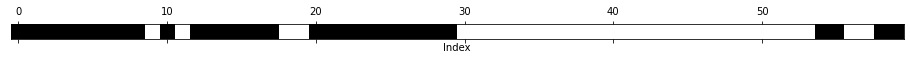

In [689]:
noise = np.random.normal(loc = 0, scale = 1, size = X.shape[0] * 30).reshape(X.shape[0], 30)
# print(norm)

X = StandardScaler().fit_transform(X)

X_noise = np.hstack((X, noise))

X_train, X_test, X_train_noise, X_test_noise, y_train, y_test = train_test_split(X, X_noise, y, random_state = 0)

F, pval = f_classif(X_train_noise, y_train)
print(np.round(F, 0), '\n')
print(np.round(pval, 2), '\n')

select = SelectPercentile(percentile = 50).fit(X_train_noise, y_train)

X_train_noise_selected = select.transform(X_train_noise)
X_test_noise_selected = select.transform(X_test_noise)

print(np.round(f_classif(X_train_noise_selected, y_train), 0)[0], '\n')

print(select.get_support())
plt.matshow(-1 * select.get_support().reshape(1, -1), cmap = 'gray')
plt.yticks([])
plt.xlabel('Index')
plt.show()

In [690]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression().fit(X_train, y_train)

print('Normal Train:\t', lor.score(X_train, y_train))
print('Normal Test:\t', lor.score(X_test, y_test))
print()

lor = LogisticRegression().fit(X_train_noise, y_train)

print('Noise Train:\t', lor.score(X_train_noise, y_train))
print('Noise Test:\t', lor.score(X_test_noise, y_test))
print()

lor = LogisticRegression().fit(X_train_noise_selected, y_train)

print('Select Train:\t', lor.score(X_train_noise_selected, y_train))
print('Select Test:\t', lor.score(X_test_noise_selected, y_test))
print()

Normal Train:	 0.9906103286384976
Normal Test:	 0.965034965034965

Noise Train:	 0.9929577464788732
Noise Test:	 0.958041958041958

Select Train:	 0.9859154929577465
Select Test:	 0.951048951048951



In [691]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train, y_train)

print('Normal Train:\t', lor.score(X_train, y_train))
print('Normal Test:\t', lor.score(X_test, y_test))
print(X_train_noise.shape)
print()

selm = SelectFromModel(lor, threshold = 'median')

selm.fit(X_train_noise, y_train)
X_train_noise_selected2 = selm.transform(X_train_noise)
X_test_noise_selected2 = selm.transform(X_test_noise)

lor.fit(X_train_noise_selected2, y_train)

print('Select Train:\t', lor.score(X_train_noise_selected2, y_train))
print('Select Test:\t', lor.score(X_test_noise_selected2, y_test))
print(X_train_noise_selected2.shape)
print()

Normal Train:	 0.9906103286384976
Normal Test:	 0.965034965034965
(426, 60)

Select Train:	 0.9906103286384976
Select Test:	 0.958041958041958
(426, 30)



In [692]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators = 30, max_depth = 6)

rand.fit(X_train, y_train)

print('Normal Train:\t', rand.score(X_train, y_train))
print('Normal Test:\t', rand.score(X_test, y_test))
print(X_train_noise.shape)
print()

selm = SelectFromModel(rand, threshold = 'median')

selm.fit(X_train_noise, y_train)
X_train_noise_selected2 = selm.transform(X_train_noise)
X_test_noise_selected2 = selm.transform(X_test_noise)

rand.fit(X_train_noise_selected2, y_train)

print('Select Train:\t', rand.score(X_train_noise_selected2, y_train))
print('Select Test:\t', rand.score(X_test_noise_selected2, y_test))
print(X_train_noise_selected2.shape)
print()

Normal Train:	 0.9976525821596244
Normal Test:	 0.965034965034965
(426, 60)

Select Train:	 0.9953051643192489
Select Test:	 0.9790209790209791
(426, 30)



In [693]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rand = RandomForestClassifier()
lor = LogisticRegression()

lor.fit(X_train, y_train)

print('Normal Train:\t', lor.score(X_train, y_train))
print('Normal Test:\t', lor.score(X_test, y_test))
print(X_train_noise.shape)
print()

selm = SelectFromModel(rand, threshold = 'median')

selm.fit(X_train_noise, y_train)
X_train_noise_selected2 = selm.transform(X_train_noise)
X_test_noise_selected2 = selm.transform(X_test_noise)

lor.fit(X_train_noise_selected2, y_train)

print('Select Train:\t', lor.score(X_train_noise_selected2, y_train))
print('Select Test:\t', lor.score(X_test_noise_selected2, y_test))
print(X_train_noise_selected2.shape)
print()

Normal Train:	 0.9906103286384976
Normal Test:	 0.965034965034965
(426, 60)

Select Train:	 0.9882629107981221
Select Test:	 0.9440559440559441
(426, 30)



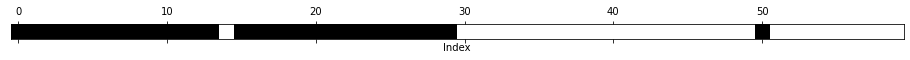

In [694]:
plt.matshow((selm.get_support() * -1).reshape(1, -1), cmap = 'gray')

plt.yticks([])
plt.xlabel('Index')
plt.show()

In [695]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rand = RandomForestClassifier()
lor = LogisticRegression()

rfe = RFE(rand, n_features_to_select = 30, step = 0.1) 
# step 0.1: 10% of features removed per step
# step 0.2: 20% of features removed per step
# step 1: 1 feature removed per step

rfe.fit(X_train_noise, y_train)
X_train_noise_selected3 = rfe.transform(X_train_noise)
X_test_noise_selected3 = rfe.transform(X_test_noise)

In [696]:
lor.fit(X_train, y_train)

print('Normal Train:\t', lor.score(X_train, y_train))
print('Normal Test:\t', lor.score(X_test, y_test))
print(X_train_noise.shape)
print()

lor.fit(X_train_noise_selected3, y_train)

print('Select Train:\t', lor.score(X_train_noise_selected3, y_train))
print('Select Test:\t', lor.score(X_test_noise_selected3, y_test))
print(X_train_noise_selected3.shape)
print()

Normal Train:	 0.9906103286384976
Normal Test:	 0.965034965034965
(426, 60)

Select Train:	 0.9859154929577465
Select Test:	 0.9440559440559441
(426, 30)



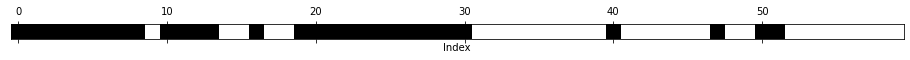

In [697]:
plt.matshow((rfe.get_support() * -1).reshape(1, -1), cmap = 'gray')

plt.yticks([])
plt.xlabel('Index')
plt.show()

In [698]:
rfe = RFE(rand, n_features_to_select = 10, step = 0.1) 

rfe.fit(X_train_noise, y_train)
X_train_noise_selected4 = rfe.transform(X_train_noise)
X_test_noise_selected4 = rfe.transform(X_test_noise)

In [699]:
lor.fit(X_train, y_train)

print('Normal Train:\t', lor.score(X_train, y_train))
print('Normal Test:\t', lor.score(X_test, y_test))
print(X_train_noise.shape)
print()

lor.fit(X_train_noise_selected4, y_train)

print('Select Train:\t', lor.score(X_train_noise_selected4, y_train))
print('Select Test:\t', lor.score(X_test_noise_selected4, y_test))
print(X_train_noise_selected4.shape)
print()

Normal Train:	 0.9906103286384976
Normal Test:	 0.965034965034965
(426, 60)

Select Train:	 0.9765258215962441
Select Test:	 0.986013986013986
(426, 10)



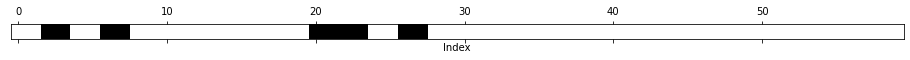

In [700]:
plt.matshow((rfe.get_support() * -1).reshape(1, -1), cmap = 'gray')

plt.yticks([])
plt.xlabel('Index')
plt.show()

In [701]:
from mglearn.datasets import load_citibike

citibike = load_citibike()
print(citibike)
print(type(citibike))
table = pd.DataFrame(citibike)
display(table)

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64
<class 'pandas.core.series.Series'>


,one
starttime,
2015-08-01 00:00:00,3
2015-08-01 03:00:00,0
2015-08-01 06:00:00,9
2015-08-01 09:00:00,41
2015-08-01 12:00:00,39
...,...
2015-08-31 09:00:00,16
2015-08-31 12:00:00,8
2015-08-31 15:00:00,17


In [702]:
table.iloc[:5,0]

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')


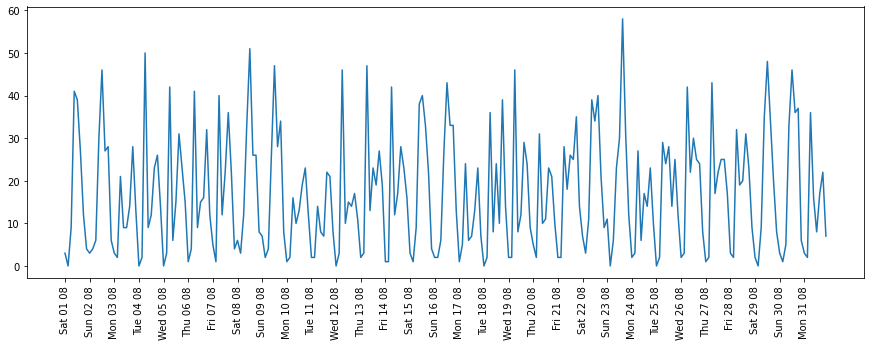

In [703]:
plt.figure(figsize = (15,5))
plt.plot(citibike)

ticks = pd.date_range(start = min(citibike.index), end = max(citibike.index), freq = 'D')
print(ticks)

plt.xticks(ticks = ticks, labels = ticks.strftime('%a %d %m'), rotation = 'vertical')

plt.show()


In [751]:
X, y = (np.array(citibike.index.strftime('%s').astype('int')).reshape(-1, 1), np.array(citibike.values))
# print(type(citibike.index))
print(X[:10])
print(X.shape)
print(y[:10])
print(y.shape)

[[1438376400]
 [1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]]
(248, 1)
[ 3  0  9 41 39 27 12  4  3  4]
(248,)


In [752]:
cutoff = X.shape[0] * 3 // 4

X_train, X_test = (X[:cutoff], X[cutoff:])
y_train, y_test = (y[:cutoff], y[cutoff:])

print(X_train.shape)
print(X_test.shape)

(186, 1)
(62, 1)


In [876]:
def predict_plot(X, y, test_size = 1 / 4, est = None, ax = None):
    
    cutoff = int(X.shape[0] - X.shape[0] * test_size)
    X_train, X_test = (X[:cutoff].reshape(-1, 1), X[cutoff:].reshape(-1, 1))
    y_train, y_test = (y[:cutoff], y[cutoff:])
    
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15, 5))
    
    x = pd.DatetimeIndex(X[:, 0] * 10e8)
    x_ticks = x[np.arange(0, len(x), 8)]
    
    ax.plot(x, y, color = 'lightblue')
    ax.set_xticks(ticks = x_ticks)
    ax.set_xticklabels(labels = x_ticks.strftime('%a %d %m'))
    ax.tick_params(axis = 'x', rotation = 90)
    
    if est == None:
        from sklearn.ensemble import RandomForestRegressor
        est = RandomForestRegressor()
    
    est.fit(X_train, y_train)
    y_train_predict = est.predict(X_train)
    y_test_predict = est.predict(X_test)
    
    x_train = pd.DatetimeIndex(X_train[:, 0] * 10e8)
    x_test = pd.DatetimeIndex(X_test[:, 0] * 10e8)
    
    ax.plot(x_train, y_train_predict, linestyle = '--', color = 'green')
    ax.plot(x_test, y_test_predict, linestyle = '--', color = 'red')
    
    ax.set_title(est.__class__.__name__)
    
    print('Train:\t', est.score(X_train, y_train))
    print('Test:\t', est.score(X_test, y_test))

Train:	 0.8842576215442357
Test:	 -1.1586828544188466


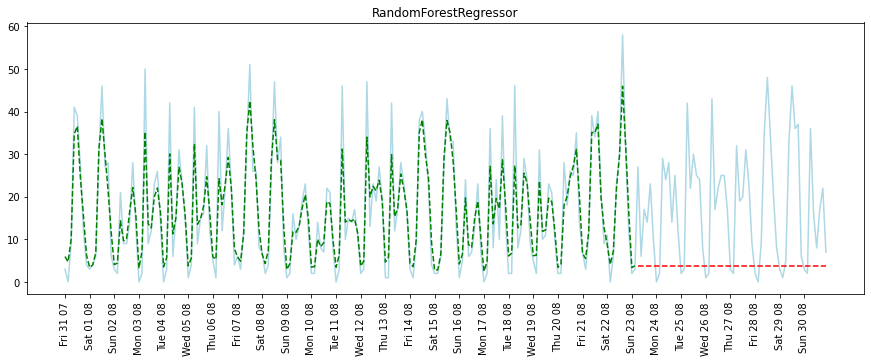

In [877]:
predict_plot(X, y)

In [878]:
print("""
The random forest isn't great at dealing with future predictions
But we know that what really matters is more likely which day of the week and which hour it is
So we need to change the way we feed our data into our tree while retaining the current information
""")


The random forest isn't great at dealing with future predictions
But we know that what really matters is more likely which day of the week and which hour it is
So we need to change the way we feed our data into our tree while retaining the current information



In [879]:
X_weeks = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%w')).astype('int').reshape(-1, 1)
X_hours = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%H')).astype('int').reshape(-1, 1)
X_ext = np.hstack((X, X_weeks, X_hours))
print(X_ext[:5])

[[1438376400          5         21]
 [1438387200          6          0]
 [1438398000          6          3]
 [1438408800          6          6]
 [1438419600          6          9]]


In [889]:
def predict_plot_ext(X, y, test_size = 1 / 4, est = None, ax = None):
    
    X_weeks = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%w')).astype('int').reshape(-1, 1)
    X_hours = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%H')).astype('int').reshape(-1, 1)
    X_ext = np.hstack((X, X_weeks, X_hours))
    
    cutoff = int(X.shape[0] - X.shape[0] * test_size)
    X_ext_train, X_ext_test = (X_ext[:cutoff].reshape(-1, 3), X_ext[cutoff:].reshape(-1, 3))
    y_train, y_test = (y[:cutoff], y[cutoff:])
    
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15, 5))
    
    x = pd.DatetimeIndex(X[:, 0] * 10e8)
    x_ticks = x[np.arange(0, len(x), 8)]
    
    ax.plot(x, y, color = 'lightblue')
    ax.set_xticks(ticks = x_ticks)
    ax.set_xticklabels(labels = x_ticks.strftime('%a %d %m'))
    ax.tick_params(axis = 'x', rotation = 90)
    
    if est == None:
        from sklearn.ensemble import RandomForestRegressor
        est = RandomForestRegressor()
    
    est.fit(X_ext_train, y_train)
    y_train_predict = est.predict(X_ext_train)
    y_test_predict = est.predict(X_ext_test)
    
    x_train = pd.DatetimeIndex(X_ext_train[:, 0] * 10e8)
    x_test = pd.DatetimeIndex(X_ext_test[:, 0] * 10e8)
    
    ax.plot(x_train, y_train_predict, linestyle = '--', color = 'green')
    ax.plot(x_test, y_test_predict, linestyle = '--', color = 'red')
    
    ax.set_title(est.__class__.__name__)
    
    print(est.__class__.__name__, 'Train:\t', est.score(X_ext_train, y_train))
    print(est.__class__.__name__, 'Test: \t', est.score(X_ext_test, y_test))

RandomForestRegressor Train:	 0.9601760171409778
RandomForestRegressor Test: 	 0.48161591128516434


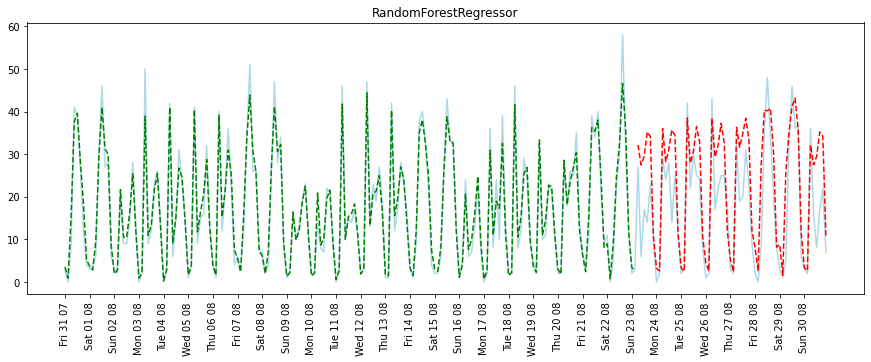

In [890]:
predict_plot_ext(X, y)

In [891]:
print("""
It appears that we're overestimating. Let's adjust our parameters a bit
""")


It appears that we're overestimating. Let's adjust our parameters a bit



DecisionTreeRegressor Train:	 0.738163935801731
DecisionTreeRegressor Test: 	 -2.6547993459869397
RandomForestRegressor Train:	 0.8778295770546842
RandomForestRegressor Test: 	 0.5768786470056002
GradientBoostingRegressor Train:	 0.8412687107557726
GradientBoostingRegressor Test: 	 0.7408855912809105
Ridge Train:	 0.013525517651254315
Ridge Test: 	 0.025740745692090727
SVR Train:	 0.7157438668531437
SVR Test: 	 -0.08451780392002495


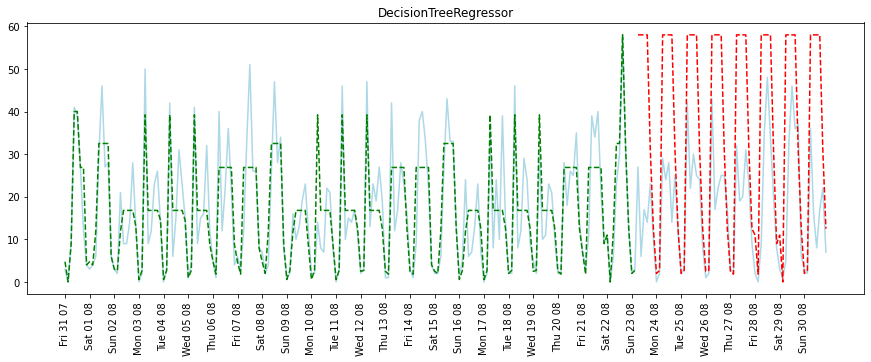

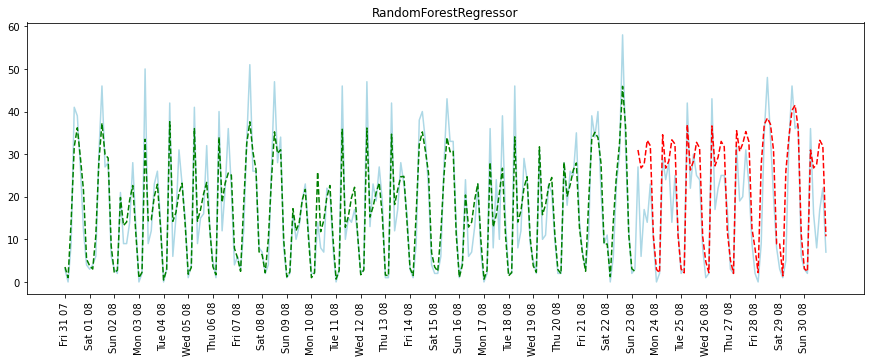

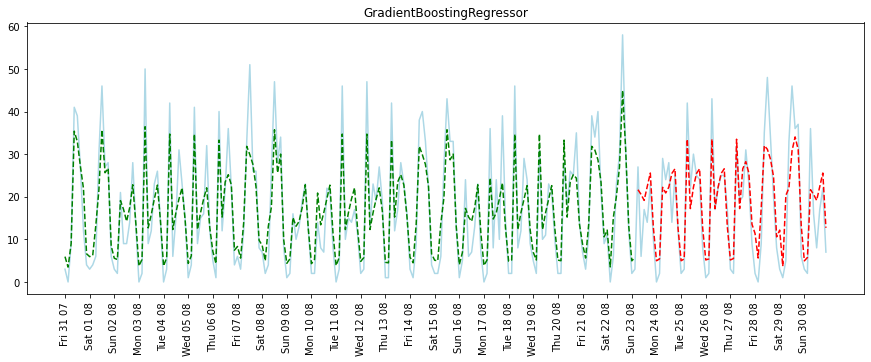

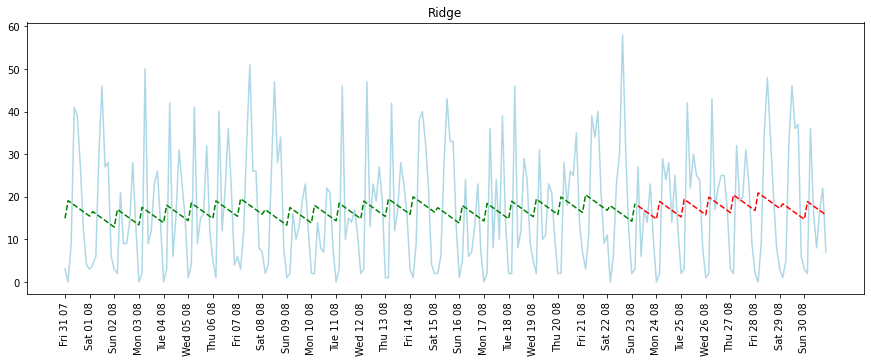

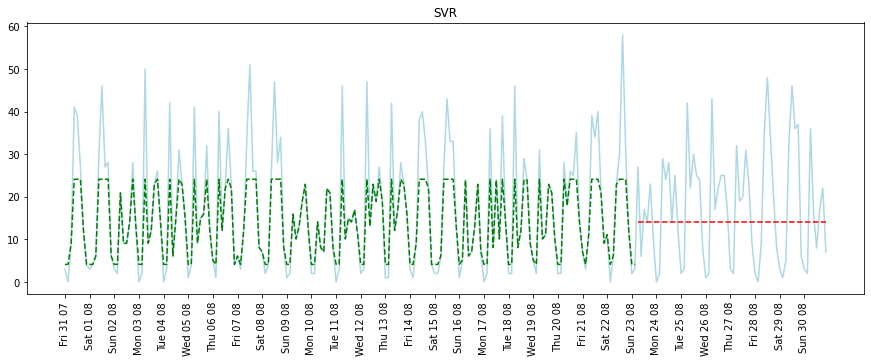

In [941]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

ran = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 0)
gbr = GradientBoostingRegressor(n_estimators = 15, max_depth = 6, learning_rate = 0.1, random_state = 1)
svr = SVR(kernel = 'rbf', C = 10, gamma = 0.5)
tre = DecisionTreeRegressor(max_depth = 6)
lin = Ridge(alpha = 0.0001)

predict_plot_ext(X, y, est = tre)
predict_plot_ext(X, y, est = ran)
predict_plot_ext(X, y, est = gbr)
predict_plot_ext(X, y, est = lin)
predict_plot_ext(X, y, est = svr)

In [942]:
def predict_plot_ext2(X, y, test_size = 1 / 4, est = None, ax = None):
    
    from sklearn.preprocessing import OneHotEncoder
    
    enc = OneHotEncoder(sparse = False)
    
    X_weeks = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%w')).astype('int').reshape(-1, 1)
    X_weeks = enc.fit_transform(X_weeks)
    X_hours = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%H')).astype('int').reshape(-1, 1)
    X_hours = enc.fit_transform(X_hours)
    X_ext = np.hstack((X, X_weeks, X_hours))
    
    cutoff = int(X.shape[0] - X.shape[0] * test_size)
    X_ext_train, X_ext_test = (X_ext[:cutoff], X_ext[cutoff:])
    y_train, y_test = (y[:cutoff], y[cutoff:])
    
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15, 5))
    
    x = pd.DatetimeIndex(X[:, 0] * 10e8)
    x_ticks = x[np.arange(0, len(x), 8)]
    
    ax.plot(x, y, color = 'lightblue')
    ax.set_xticks(ticks = x_ticks)
    ax.set_xticklabels(labels = x_ticks.strftime('%a %d %m'))
    ax.tick_params(axis = 'x', rotation = 90)
    
    if est == None:
        from sklearn.ensemble import RandomForestRegressor
        est = RandomForestRegressor()
    
    est.fit(X_ext_train, y_train)
    y_train_predict = est.predict(X_ext_train)
    y_test_predict = est.predict(X_ext_test)
    
    x_train = pd.DatetimeIndex(X_ext_train[:, 0] * 10e8)
    x_test = pd.DatetimeIndex(X_ext_test[:, 0] * 10e8)
    
    ax.plot(x_train, y_train_predict, linestyle = '--', color = 'green')
    ax.plot(x_test, y_test_predict, linestyle = '--', color = 'red')
    
    ax.set_title(est.__class__.__name__)
    
    print(est.__class__.__name__, 'Train:\t', est.score(X_ext_train, y_train))
    print(est.__class__.__name__, 'Test: \t', est.score(X_ext_test, y_test))

DecisionTreeRegressor Train:	 0.6243907689281705
DecisionTreeRegressor Test: 	 0.039736283443144615
RandomForestRegressor Train:	 0.7354019295936594
RandomForestRegressor Test: 	 0.5023956192980867
GradientBoostingRegressor Train:	 0.6487446382791044
GradientBoostingRegressor Test: 	 0.5278765919629551
Ridge Train:	 0.5396862878239772
Ridge Test: 	 0.6205922348052204
SVR Train:	 0.7157438668531437
SVR Test: 	 -0.08451780392002495


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.59885e-18): result may not be accurate.
  overwrite_a=True).T


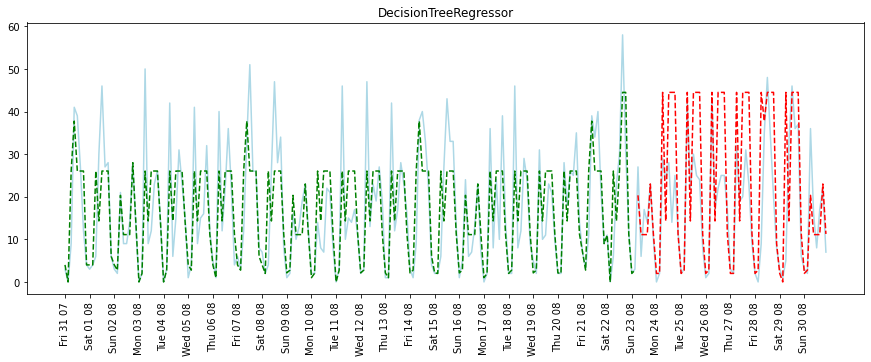

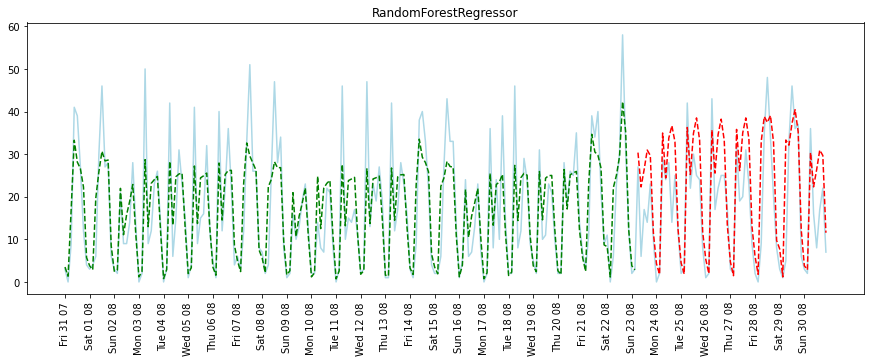

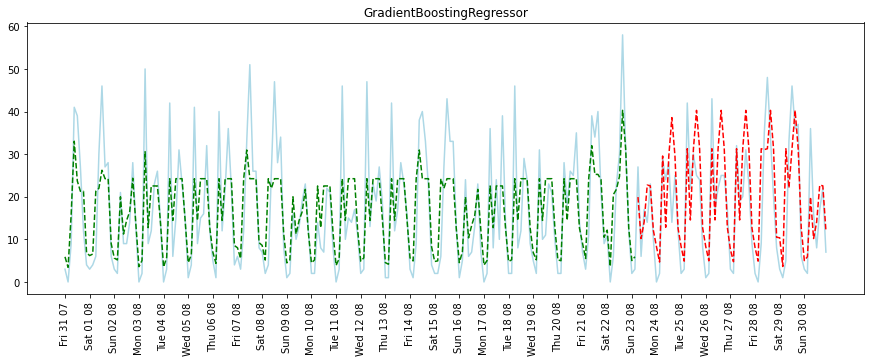

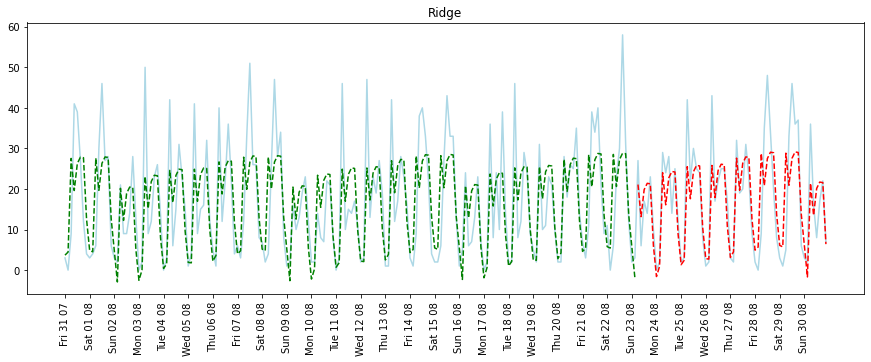

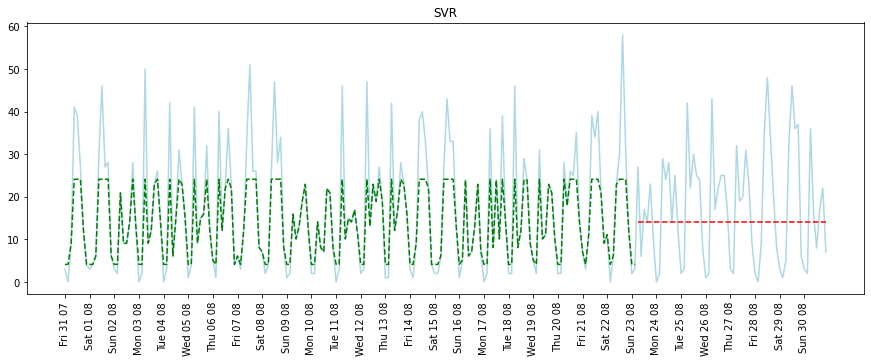

In [939]:
ran = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 0)
gbr = GradientBoostingRegressor(n_estimators = 15, max_depth = 6, learning_rate = 0.1, random_state = 1)
svr = SVR(kernel = 'rbf', C = 10, gamma = 0.5)
tre = DecisionTreeRegressor(max_depth = 6)
lin = Ridge(alpha = 0.0001)

predict_plot_ext2(X, y, est = tre)
predict_plot_ext2(X, y, est = ran)
predict_plot_ext2(X, y, est = gbr)
predict_plot_ext2(X, y, est = lin)
predict_plot_ext2(X, y, est = svr)

In [988]:
def predict_plot_ext3(X, y, test_size = 1 / 4, est = None, ax = None):
    
    from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
    
    enc = OneHotEncoder(sparse = False)
    pol = PolynomialFeatures(2, interaction_only = True)
    
    X_weeks = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%w')).astype('int').reshape(-1, 1)
    X_hours = np.array(pd.DatetimeIndex(X[:, 0] * 10e8).strftime('%H')).astype('int').reshape(-1, 1)
    
    X_weeks = enc.fit_transform(X_weeks)
    X_hours = enc.fit_transform(X_hours)
    
    X_weeks_hours = pol.fit_transform(np.hstack((X_weeks, X_hours)))
    
    X_ext = np.hstack((X, X_weeks_hours))
#     X_ext = np.hstack((X, X_weeks, X_hours))
    
    cutoff = int(X.shape[0] - X.shape[0] * test_size)
    X_ext_train, X_ext_test = (X_ext[:cutoff], X_ext[cutoff:])
    y_train, y_test = (y[:cutoff], y[cutoff:])
    
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15, 5))
    
    x = pd.DatetimeIndex(X[:, 0] * 10e8)
    x_ticks = x[np.arange(0, len(x), 8)]
    
    ax.plot(x, y, color = 'lightblue')
    ax.set_xticks(ticks = x_ticks)
    ax.set_xticklabels(labels = x_ticks.strftime('%a %d %m'))
    ax.tick_params(axis = 'x', rotation = 90)
    
    if est == None:
        from sklearn.ensemble import RandomForestRegressor
        est = RandomForestRegressor()
    
    est.fit(X_ext_train, y_train)
    y_train_predict = est.predict(X_ext_train)
    y_test_predict = est.predict(X_ext_test)
    
    x_train = pd.DatetimeIndex(X_ext_train[:, 0] * 10e8)
    x_test = pd.DatetimeIndex(X_ext_test[:, 0] * 10e8)
    
    ax.plot(x_train, y_train_predict, linestyle = '--', color = 'green')
    ax.plot(x_test, y_test_predict, linestyle = '--', color = 'red')
    
    ax.set_title(est.__class__.__name__)
    
    print(est.__class__.__name__, 'Train:\t', est.score(X_ext_train, y_train))
    print(est.__class__.__name__, 'Test: \t', est.score(X_ext_test, y_test))

Ridge Train:	 0.8750936179729916
Ridge Test: 	 0.8472612779788252
LinearRegression Train:	 0.8925194432084194
LinearRegression Test: 	 0.8393071198348596
DecisionTreeRegressor Train:	 0.621665071930392
DecisionTreeRegressor Test: 	 0.6862587151013064
RandomForestRegressor Train:	 0.7515060372064484
RandomForestRegressor Test: 	 0.7221205135283255
GradientBoostingRegressor Train:	 0.772887333924942
GradientBoostingRegressor Test: 	 0.7152548472903377
SVR Train:	 0.7157438668531437
SVR Test: 	 -0.08451780392002495


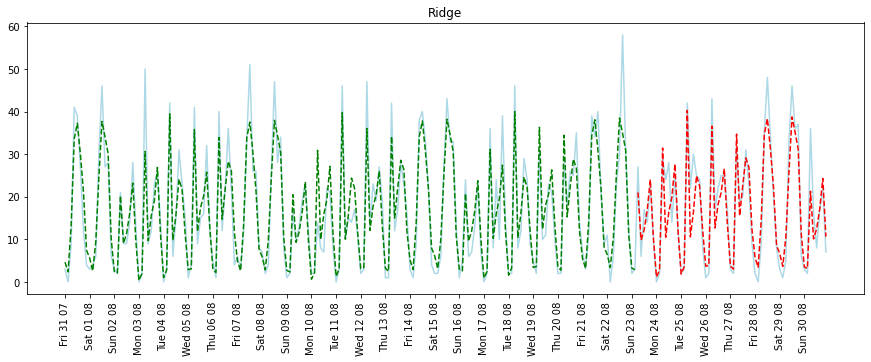

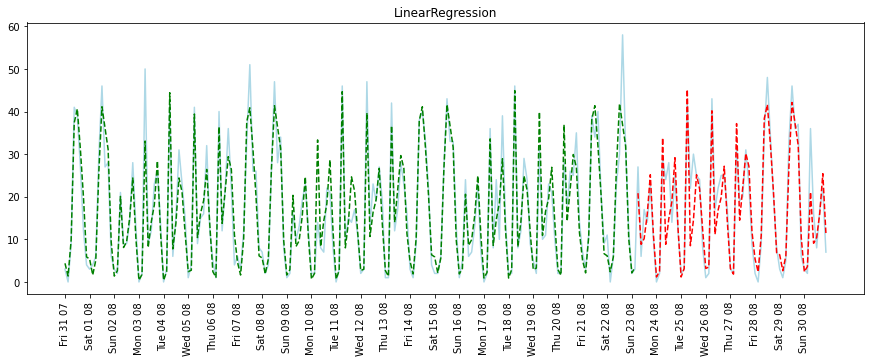

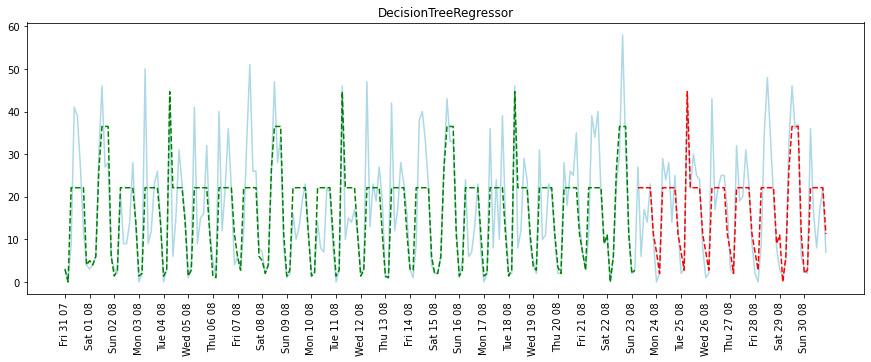

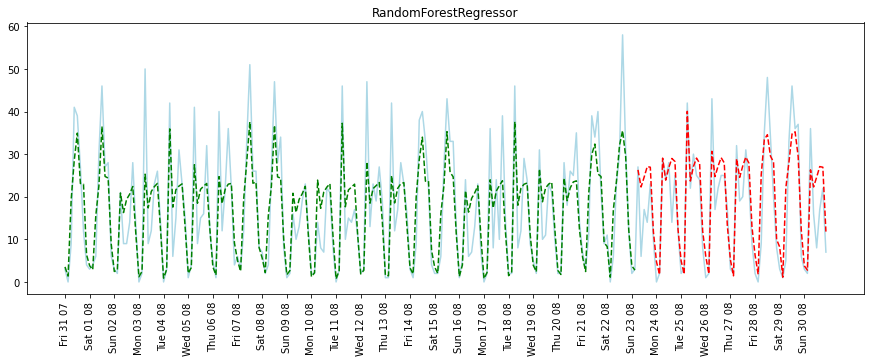

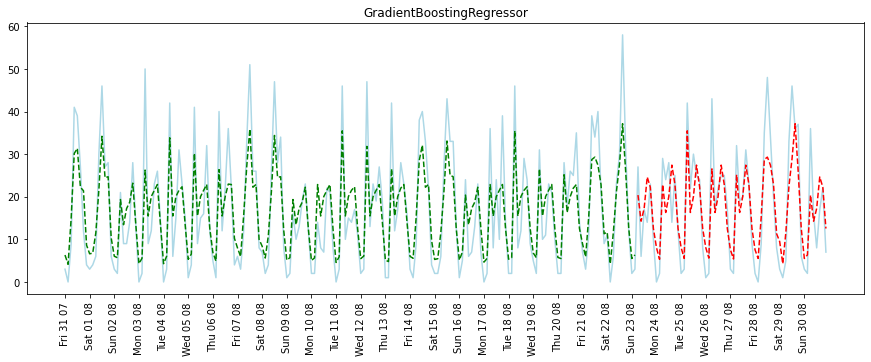

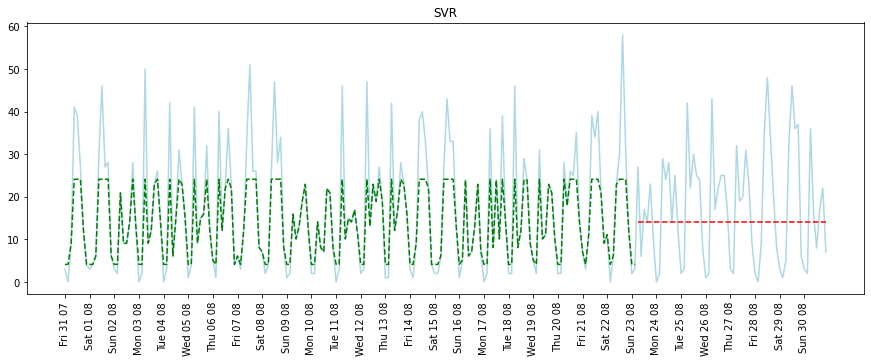

In [996]:
from sklearn.linear_model import LinearRegression

rid = Ridge(alpha = 1)
lin = LinearRegression()
ran = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 0)
gbr = GradientBoostingRegressor(n_estimators = 15, max_depth = 6, learning_rate = 0.1, random_state = 1)
svr = SVR(kernel = 'rbf', C = 10, gamma = 0.5)
tre = DecisionTreeRegressor(max_depth = 6)

predict_plot_ext3(X, y, est = rid)
predict_plot_ext3(X, y, est = lin)
predict_plot_ext3(X, y, est = tre)
predict_plot_ext3(X, y, est = ran)
predict_plot_ext3(X, y, est = gbr)
predict_plot_ext3(X, y, est = svr)